# 라이브러리 설치 및 import

In [ ]:
import pandas as pd
import numpy as np
import urllib.request as ul
import datetime
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [ ]:
# 한글폰트 사용하기 위해서
!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
import matplotlib.font_manager as fm
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=font_path, size=10)
fm._rebuild()

plt.rc('font', family='NanumBarunGothic')

# '런타임 다시 시작 및 모두 실행' 해주기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 import

In [ ]:
# 데이터 불러오기
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2022_1_데이터사이언스개론/전처리완료_방문한곳.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2022_1_데이터사이언스개론/전처리중_교통카드이용내역.xlsx')

In [ ]:
df1

,장소,주소,시,구,시군구,방문일자
0,카페롱,서울 광진구 광나루로 360 1층 102호 (화양동),서울,광진구,서울 광진구,20220524
1,스테이크어스 건대점,서울 광진구 아차산로 229 한림타워 2층 (화양동),서울,광진구,서울 광진구,20220524
2,와가마마,서울 동작구 만양로14길 12 (노량진동),서울,동작구,서울 동작구,20220514
3,몬스터VR 삼성코엑스점,서울 강남구 영동대로 513 코엑스 지하1층 (삼성동),서울,강남구,서울 강남구,20220516
4,코엑스,서울 강남구 영동대로 513 무역센터코엑스 4층 (삼성동),서울,강남구,서울 강남구,20220516
...,...,...,...,...,...,...
58,오늘의파스타,서울 노원구 공릉로 118 1층 (공릉동),서울,노원구,서울 노원구,20220301
59,울림초밥,서울 노원구 동일로 986 (공릉동),서울,노원구,서울 노원구,20220301
60,롯데월드아쿠아리움,서울 송파구 올림픽로 300 롯데월드몰 엔터테인먼트동 지하 1층 (신천동),서울,송파구,서울 송파구,20220301
61,흥인지문공원,서울 종로구 종로 285 (종로6가),서울,종로구,서울 종로구,20220315


In [ ]:
df2

,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,환승여부,결제일자
0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,False,2022-03-18
1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,False,2022-03-18
2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,False,2022-03-18
3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,False,2022-03-18
4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,False,2022-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-05-24,경기마을버스,5272-89**-****-5154,16:25:14,16:35:35,서울여대.육군사,묵1동주민센터입,82A,(주)태산운수,1300,False,2022-06-07
137,2022-05-24,도시철도,5272-89**-****-5154,16:40:00,17:06:02,먹골,건대입구,NaN,NaN,100,True,2022-06-07
138,2022-05-24,도시철도,5272-89**-****-5154,23:19:31,23:44:37,어린이대공원(세,태릉입구,NaN,NaN,1250,False,2022-06-07
139,2022-05-25,경기마을버스,5272-89**-****-5154,11:38:37,11:45:12,주유소앞다운복지,서울여대.육군사,82B,(주)태산운수,1300,False,2022-06-07


# 데이터 전처리(preprocessing)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   장소      63 non-null     object
 1   주소      63 non-null     object
 2   시       63 non-null     object
 3   구       63 non-null     object
 4   시군구     63 non-null     object
 5   방문일자    63 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.1+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이용일자    141 non-null    object
 1   이용수단    141 non-null    object
 2   이용카드    141 non-null    object
 3   승차시간    141 non-null    object
 4   하차시간    141 non-null    object
 5   승차역     141 non-null    object
 6   하차역     141 non-null    object
 7   노선번호    86 non-null     object
 8   운수사명    86 non-null     object
 9   이용금액    141 non-null    int64 
 10  환승여부    141 non-null    bool  
 11  결제일자    141 non-null    object
dtypes: bool(1), int64(1), object(10)
memory usage: 12.4+ KB


In [ ]:
df1.isnull().sum()

장소      0
주소      0
시       0
구       0
시군구     0
방문일자    0
dtype: int64

In [ ]:
df2.isnull().sum()
## 노선번호와 운수사명은 버스 이용시에만 입력되는 데이터이므로 결측치 처리할 필요 없음.

이용일자     0
이용수단     0
이용카드     0
승차시간     0
하차시간     0
승차역      0
하차역      0
노선번호    55
운수사명    55
이용금액     0
환승여부     0
결제일자     0
dtype: int64

## 요일 컬럼 생성

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   장소      63 non-null     object
 1   주소      63 non-null     object
 2   시       63 non-null     object
 3   구       63 non-null     object
 4   시군구     63 non-null     object
 5   방문일자    63 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.1+ KB


In [ ]:
df1['방문일자'] = df1['방문일자'].astype('string')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   장소      63 non-null     object
 1   주소      63 non-null     object
 2   시       63 non-null     object
 3   구       63 non-null     object
 4   시군구     63 non-null     object
 5   방문일자    63 non-null     string
dtypes: object(5), string(1)
memory usage: 3.1+ KB


In [ ]:
df1['방문일자'] = df1['방문일자'].apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df1 = df1.reset_index(drop=True)
df1

,장소,주소,시,구,시군구,방문일자
0,카페롱,서울 광진구 광나루로 360 1층 102호 (화양동),서울,광진구,서울 광진구,2022-05-24
1,스테이크어스 건대점,서울 광진구 아차산로 229 한림타워 2층 (화양동),서울,광진구,서울 광진구,2022-05-24
2,와가마마,서울 동작구 만양로14길 12 (노량진동),서울,동작구,서울 동작구,2022-05-14
3,몬스터VR 삼성코엑스점,서울 강남구 영동대로 513 코엑스 지하1층 (삼성동),서울,강남구,서울 강남구,2022-05-16
4,코엑스,서울 강남구 영동대로 513 무역센터코엑스 4층 (삼성동),서울,강남구,서울 강남구,2022-05-16
...,...,...,...,...,...,...
58,오늘의파스타,서울 노원구 공릉로 118 1층 (공릉동),서울,노원구,서울 노원구,2022-03-01
59,울림초밥,서울 노원구 동일로 986 (공릉동),서울,노원구,서울 노원구,2022-03-01
60,롯데월드아쿠아리움,서울 송파구 올림픽로 300 롯데월드몰 엔터테인먼트동 지하 1층 (신천동),서울,송파구,서울 송파구,2022-03-01
61,흥인지문공원,서울 종로구 종로 285 (종로6가),서울,종로구,서울 종로구,2022-03-15


In [ ]:
# df1 방문요일 컬럼 추가
days = ['월', '화', '수', '목', '금', '토', '일']
df1['방문요일'] = df1['방문일자'].apply(lambda x:  days[pd.Timestamp(x).weekday()])
df1

,장소,주소,시,구,시군구,방문일자,방문요일
0,카페롱,서울 광진구 광나루로 360 1층 102호 (화양동),서울,광진구,서울 광진구,2022-05-24,화
1,스테이크어스 건대점,서울 광진구 아차산로 229 한림타워 2층 (화양동),서울,광진구,서울 광진구,2022-05-24,화
2,와가마마,서울 동작구 만양로14길 12 (노량진동),서울,동작구,서울 동작구,2022-05-14,토
3,몬스터VR 삼성코엑스점,서울 강남구 영동대로 513 코엑스 지하1층 (삼성동),서울,강남구,서울 강남구,2022-05-16,월
4,코엑스,서울 강남구 영동대로 513 무역센터코엑스 4층 (삼성동),서울,강남구,서울 강남구,2022-05-16,월
...,...,...,...,...,...,...,...
58,오늘의파스타,서울 노원구 공릉로 118 1층 (공릉동),서울,노원구,서울 노원구,2022-03-01,화
59,울림초밥,서울 노원구 동일로 986 (공릉동),서울,노원구,서울 노원구,2022-03-01,화
60,롯데월드아쿠아리움,서울 송파구 올림픽로 300 롯데월드몰 엔터테인먼트동 지하 1층 (신천동),서울,송파구,서울 송파구,2022-03-01,화
61,흥인지문공원,서울 종로구 종로 285 (종로6가),서울,종로구,서울 종로구,2022-03-15,화


In [ ]:
# df2 이용요일 컬럼 추가
days = ['월', '화', '수', '목', '금', '토', '일']
df2['이용요일'] = df2['이용일자'].apply(lambda x:  days[pd.Timestamp(x).weekday()])
df2

,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,환승여부,결제일자,이용요일
0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,False,2022-03-18,수
1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,False,2022-03-18,수
2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,False,2022-03-18,목
3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,False,2022-03-18,목
4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,False,2022-03-18,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-05-24,경기마을버스,5272-89**-****-5154,16:25:14,16:35:35,서울여대.육군사,묵1동주민센터입,82A,(주)태산운수,1300,False,2022-06-07,화
137,2022-05-24,도시철도,5272-89**-****-5154,16:40:00,17:06:02,먹골,건대입구,NaN,NaN,100,True,2022-06-07,화
138,2022-05-24,도시철도,5272-89**-****-5154,23:19:31,23:44:37,어린이대공원(세,태릉입구,NaN,NaN,1250,False,2022-06-07,화
139,2022-05-25,경기마을버스,5272-89**-****-5154,11:38:37,11:45:12,주유소앞다운복지,서울여대.육군사,82B,(주)태산운수,1300,False,2022-06-07,수


## 환승시간 컬럼 생성, 환승 관련 전처리

In [ ]:
pd.set_option('display.max_rows',200)
df2.loc[df2['환승여부']==True,"환승여부"] = 'Y'
df2.loc[df2['환승여부']==False,"환승여부"] = 'N'

df2['환승승차'] = df2['승차시간']
df2['환승하차'] = df2['하차시간']
df2['환승'] = df2['환승여부']

for i in range(len(df2)):
  if df2.loc[i,"환승여부"] == 'Y':
    #print(i)
    df2.loc[i-1,"환승"] = df2.loc[i,"환승여부"]
    df2.loc[i-1,"환승승차"] = df2.loc[i,"승차시간"]
    df2.loc[i-1,"환승하차"] = df2.loc[i,"하차시간"]
    df2.loc[i-1,"하차역"] = df2.loc[i,"하차역"] # 환승 이전 하차역 -> 환승 후 하차역
    df2.loc[i-1,"이용금액"] += df2.loc[i,"이용금액"] # 환승 이전 이용금액 + 환승 이용금액

flag = df2[df2['환승여부']=="Y"].index
df2.drop(flag,inplace=True,axis=0)
df2.drop(["환승여부"],axis=1,inplace=True)

df2.reset_index(inplace=True)

for i in range(len(df2)):
  if df2.loc[i,"환승"]=="N":
    df2.loc[i,"환승승차"]="00:00:00"
    df2.loc[i,"환승하차"]="00:00:00"

In [ ]:
df2.head(20)

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승
0,0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N
1,1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,00:00:00,00:00:00,N
3,3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,00:00:00,00:00:00,N
4,4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N
5,5,2022-03-03,지하철,5272-89**-****-5154,23:25:08,00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N
6,6,2022-03-04,도시철도,5272-89**-****-5154,15:04:00,15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N
7,7,2022-03-04,지하철,5272-89**-****-5154,21:09:07,21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N
8,8,2022-03-06,도시철도,5272-89**-****-5154,15:04:02,15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N
9,9,2022-03-06,도시철도,5272-89**-****-5154,21:22:51,22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N


In [ ]:
df2.tail(20)

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승
105,118,2022-05-15,서울버스,5272-89**-****-5154,22:16:09,22:29:47,혜화역.마로니에,태릉입구,273,메트로버스(주),1250,2022-05-18,일,22:32:05,22:49:16,Y
106,120,2022-05-16,서울버스,5272-89**-****-5154,11:35:11,11:42:29,주유소앞다운복지,서울여대.육군사,202,태릉교통주식회사,1200,2022-06-07,월,00:00:00,00:00:00,N
107,121,2022-05-16,서울버스,5272-89**-****-5154,14:52:40,15:00:39,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-06-07,월,00:00:00,00:00:00,N
108,122,2022-05-16,도시철도,5272-89**-****-5154,15:48:55,16:29:07,태릉입구,삼성(무역센터),NaN,NaN,1450,2022-06-07,월,00:00:00,00:00:00,N
109,123,2022-05-16,지하철,5272-89**-****-5154,21:40:32,22:25:26,삼성(무역센터),태릉입구,NaN,NaN,1450,2022-06-07,월,00:00:00,00:00:00,N
110,124,2022-05-17,서울버스,5272-89**-****-5154,10:08:20,10:14:15,주유소앞다운복지,서울여대.육군사,202,태릉교통주식회사,1200,2022-06-07,화,00:00:00,00:00:00,N
111,125,2022-05-17,서울버스,5272-89**-****-5154,16:13:20,16:20:51,서울여대.육군사,경춘선숲길.토끼,1156,태릉교통주식회사,1200,2022-06-07,화,00:00:00,00:00:00,N
112,126,2022-05-18,서울버스,5272-89**-****-5154,11:36:44,11:42:31,주유소앞다운복지,서울여대.육군사,202,태릉교통주식회사,1200,2022-06-07,수,00:00:00,00:00:00,N
113,127,2022-05-18,경기마을버스,5272-89**-****-5154,16:23:32,16:28:13,서울여대.육군사,화랑대역2번출구,82A,(주)태산운수,1300,2022-06-07,수,00:00:00,00:00:00,N
114,128,2022-05-19,서울버스,5272-89**-****-5154,10:05:21,10:12:11,주유소앞다운복지,서울여대.육군사,1155,태릉교통주식회사,1200,2022-06-07,목,00:00:00,00:00:00,N


## 이용시간 컬럼 생성

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   125 non-null    int64 
 1   이용일자    125 non-null    object
 2   이용수단    125 non-null    object
 3   이용카드    125 non-null    object
 4   승차시간    125 non-null    object
 5   하차시간    125 non-null    object
 6   승차역     125 non-null    object
 7   하차역     125 non-null    object
 8   노선번호    77 non-null     object
 9   운수사명    77 non-null     object
 10  이용금액    125 non-null    int64 
 11  결제일자    125 non-null    object
 12  이용요일    125 non-null    object
 13  환승승차    125 non-null    object
 14  환승하차    125 non-null    object
 15  환승      125 non-null    object
dtypes: int64(2), object(14)
memory usage: 15.8+ KB


In [ ]:
df2['승차시간']=df2['승차시간'].astype('string')
df2['하차시간']=df2['하차시간'].astype('string')
df2['환승승차']=df2['환승승차'].astype('string')
df2['환승하차']=df2['환승하차'].astype('string')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   125 non-null    int64 
 1   이용일자    125 non-null    object
 2   이용수단    125 non-null    object
 3   이용카드    125 non-null    object
 4   승차시간    125 non-null    string
 5   하차시간    125 non-null    string
 6   승차역     125 non-null    object
 7   하차역     125 non-null    object
 8   노선번호    77 non-null     object
 9   운수사명    77 non-null     object
 10  이용금액    125 non-null    int64 
 11  결제일자    125 non-null    object
 12  이용요일    125 non-null    object
 13  환승승차    125 non-null    string
 14  환승하차    125 non-null    string
 15  환승      125 non-null    object
dtypes: int64(2), object(10), string(4)
memory usage: 15.8+ KB


In [ ]:
df2['승차시간'] = df2['승차시간'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
df2['하차시간'] = df2['하차시간'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
df2['환승승차'] = df2['환승승차'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
df2['환승하차'] = df2['환승하차'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))

df2 = df2.reset_index(drop=True)
df2

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승
0,0,2022-03-02,서울버스,5272-89**-****-5154,1900-01-01 10:45:17,1900-01-01 10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,1900-01-01 00:00:00,1900-01-01 00:00:00,N
1,1,2022-03-02,서울버스,5272-89**-****-5154,1900-01-01 17:28:15,1900-01-01 17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,1900-01-01 00:00:00,1900-01-01 00:00:00,N
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,1900-01-01 13:08:05,1900-01-01 13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,1900-01-01 00:00:00,1900-01-01 00:00:00,N
3,3,2022-03-03,서울버스,5272-89**-****-5154,1900-01-01 15:36:35,1900-01-01 15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,1900-01-01 00:00:00,1900-01-01 00:00:00,N
4,4,2022-03-03,도시철도,5272-89**-****-5154,1900-01-01 17:56:02,1900-01-01 18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,1900-01-01 00:00:00,1900-01-01 00:00:00,N
5,5,2022-03-03,지하철,5272-89**-****-5154,1900-01-01 23:25:08,1900-01-01 00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,1900-01-01 00:00:00,1900-01-01 00:00:00,N
6,6,2022-03-04,도시철도,5272-89**-****-5154,1900-01-01 15:04:00,1900-01-01 15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,1900-01-01 00:00:00,1900-01-01 00:00:00,N
7,7,2022-03-04,지하철,5272-89**-****-5154,1900-01-01 21:09:07,1900-01-01 21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,1900-01-01 00:00:00,1900-01-01 00:00:00,N
8,8,2022-03-06,도시철도,5272-89**-****-5154,1900-01-01 15:04:02,1900-01-01 15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,1900-01-01 00:00:00,1900-01-01 00:00:00,N
9,9,2022-03-06,도시철도,5272-89**-****-5154,1900-01-01 21:22:51,1900-01-01 22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,1900-01-01 00:00:00,1900-01-01 00:00:00,N


In [ ]:
df2['이용시간'] = (df2['하차시간'] - df2['승차시간']) + (df2['환승하차'] - df2['환승승차'])
df2['이용시간'] = df2['이용시간'].apply(lambda x: str(x)[7:])
df2.head()

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간
0,0,2022-03-02,서울버스,5272-89**-****-5154,1900-01-01 10:45:17,1900-01-01 10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,1900-01-01,1900-01-01,N,00:06:24
1,1,2022-03-02,서울버스,5272-89**-****-5154,1900-01-01 17:28:15,1900-01-01 17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,1900-01-01,1900-01-01,N,00:07:35
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,1900-01-01 13:08:05,1900-01-01 13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,1900-01-01,1900-01-01,N,00:04:46
3,3,2022-03-03,서울버스,5272-89**-****-5154,1900-01-01 15:36:35,1900-01-01 15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,1900-01-01,1900-01-01,N,00:07:03
4,4,2022-03-03,도시철도,5272-89**-****-5154,1900-01-01 17:56:02,1900-01-01 18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,1900-01-01,1900-01-01,N,00:37:14


In [ ]:
df2['승차시간'] = df2['승차시간'].apply(lambda x: str(x)[11:])
df2['하차시간'] = df2['하차시간'].apply(lambda x: str(x)[11:])
df2['환승승차'] = df2['환승승차'].apply(lambda x: str(x)[11:])
df2['환승하차'] = df2['환승하차'].apply(lambda x: str(x)[11:])

df2

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간
0,0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:06:24
1,1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:07:35
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,00:00:00,00:00:00,N,00:04:46
3,3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,00:00:00,00:00:00,N,00:07:03
4,4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:37:14
5,5,2022-03-03,지하철,5272-89**-****-5154,23:25:08,00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,+00:39:26
6,6,2022-03-04,도시철도,5272-89**-****-5154,15:04:00,15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:38:58
7,7,2022-03-04,지하철,5272-89**-****-5154,21:09:07,21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:50:48
8,8,2022-03-06,도시철도,5272-89**-****-5154,15:04:02,15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:32:08
9,9,2022-03-06,도시철도,5272-89**-****-5154,21:22:51,22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:42:31


In [ ]:
# 이용시간 표시 오류 값 변경 : s +00:39:26 -> 00:39:26
df2.loc[5,'이용시간'] = '00:39:26'
df2.loc[5,'이용시간']

'00:39:26'

## 승차시각 컬럼 생성

In [ ]:
# 승차시각 컬럼 생성
df2['승차시각'] = df2['승차시간'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
df2 = df2.reset_index(drop=True)
df2['승차시각'] = df2['승차시각'].apply(lambda x: str(x)[11:13])
df2

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간,승차시각
0,0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:06:24,10
1,1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:07:35,17
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,00:00:00,00:00:00,N,00:04:46,13
3,3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,00:00:00,00:00:00,N,00:07:03,15
4,4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:37:14,17
5,5,2022-03-03,지하철,5272-89**-****-5154,23:25:08,00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:39:26,23
6,6,2022-03-04,도시철도,5272-89**-****-5154,15:04:00,15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:38:58,15
7,7,2022-03-04,지하철,5272-89**-****-5154,21:09:07,21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:50:48,21
8,8,2022-03-06,도시철도,5272-89**-****-5154,15:04:02,15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:32:08,15
9,9,2022-03-06,도시철도,5272-89**-****-5154,21:22:51,22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:42:31,21


## 컬럼 타입 변경

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   125 non-null    int64 
 1   이용일자    125 non-null    object
 2   이용수단    125 non-null    object
 3   이용카드    125 non-null    object
 4   승차시간    125 non-null    object
 5   하차시간    125 non-null    object
 6   승차역     125 non-null    object
 7   하차역     125 non-null    object
 8   노선번호    77 non-null     object
 9   운수사명    77 non-null     object
 10  이용금액    125 non-null    int64 
 11  결제일자    125 non-null    object
 12  이용요일    125 non-null    object
 13  환승승차    125 non-null    object
 14  환승하차    125 non-null    object
 15  환승      125 non-null    object
 16  이용시간    125 non-null    object
 17  승차시각    125 non-null    object
dtypes: int64(2), object(16)
memory usage: 17.7+ KB


In [ ]:
df2['이용일자'] = df2['이용일자'].astype('string')

In [ ]:
df2['이용일자'] = df2['이용일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df2 = df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   125 non-null    int64         
 1   이용일자    125 non-null    datetime64[ns]
 2   이용수단    125 non-null    object        
 3   이용카드    125 non-null    object        
 4   승차시간    125 non-null    object        
 5   하차시간    125 non-null    object        
 6   승차역     125 non-null    object        
 7   하차역     125 non-null    object        
 8   노선번호    77 non-null     object        
 9   운수사명    77 non-null     object        
 10  이용금액    125 non-null    int64         
 11  결제일자    125 non-null    object        
 12  이용요일    125 non-null    object        
 13  환승승차    125 non-null    object        
 14  환승하차    125 non-null    object        
 15  환승      125 non-null    object        
 16  이용시간    125 non-null    object        
 17  승차시각    125 non-null    object        
dtypes: datetim

In [ ]:
df2

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간,승차시각
0,0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:06:24,10
1,1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:07:35,17
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,00:00:00,00:00:00,N,00:04:46,13
3,3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,00:00:00,00:00:00,N,00:07:03,15
4,4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:37:14,17
5,5,2022-03-03,지하철,5272-89**-****-5154,23:25:08,00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:39:26,23
6,6,2022-03-04,도시철도,5272-89**-****-5154,15:04:00,15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:38:58,15
7,7,2022-03-04,지하철,5272-89**-****-5154,21:09:07,21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:50:48,21
8,8,2022-03-06,도시철도,5272-89**-****-5154,15:04:02,15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:32:08,15
9,9,2022-03-06,도시철도,5272-89**-****-5154,21:22:51,22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:42:31,21


# 데이터 분석 및 시각화(df1_방문한곳)

In [ ]:
df1

,장소,주소,시,구,시군구,방문일자,방문요일
0,카페롱,서울 광진구 광나루로 360 1층 102호 (화양동),서울,광진구,서울 광진구,2022-05-24,화
1,스테이크어스 건대점,서울 광진구 아차산로 229 한림타워 2층 (화양동),서울,광진구,서울 광진구,2022-05-24,화
2,와가마마,서울 동작구 만양로14길 12 (노량진동),서울,동작구,서울 동작구,2022-05-14,토
3,몬스터VR 삼성코엑스점,서울 강남구 영동대로 513 코엑스 지하1층 (삼성동),서울,강남구,서울 강남구,2022-05-16,월
4,코엑스,서울 강남구 영동대로 513 무역센터코엑스 4층 (삼성동),서울,강남구,서울 강남구,2022-05-16,월
5,탄탄면공방 강남점,서울 강남구 테헤란로4길 40 신소애빌딩 1층 (역삼동),서울,강남구,서울 강남구,2022-05-16,월
6,전쟁기념관,서울 용산구 이태원로 29 (용산동1가),서울,용산구,서울 용산구,2022-05-22,일
7,아이파크몰,서울 용산구 한강대로23길 55 (한강로3가),서울,용산구,서울 용산구,2022-05-10,화
8,아이파크몰,서울 용산구 한강대로23길 55 (한강로3가),서울,용산구,서울 용산구,2022-05-22,일
9,버뮤다삼각지,"서울 용산구 한강대로52길 19 1,2층 (한강로2가)",서울,용산구,서울 용산구,2022-05-22,일


In [ ]:
df1.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,장소,주소,시,구,시군구,방문일자,방문요일
count,63,63,63,63,63,63,63
unique,60,60,2,11,11,27,7
top,아이파크몰,서울 용산구 한강대로23길 55 (한강로3가),서울,노원구,서울 노원구,2022-04-29 00:00:00,화
freq,2,2,61,16,16,5,17
first,NaN,NaN,NaN,NaN,NaN,2022-03-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-05-24 00:00:00,NaN


## 요일분석

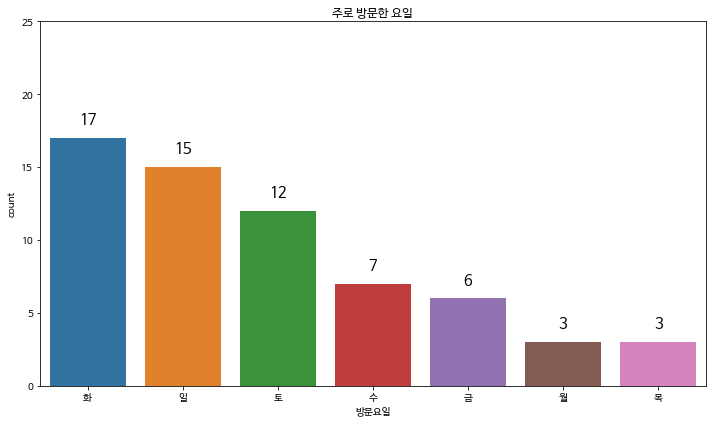

In [ ]:
## 방문요일이 많은 요일
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = '방문요일', data = df1,
                  order = df1['방문요일'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 25)

plt.title("주로 방문한 요일")
plt.tight_layout()
plt.show()

## 주로 화요일, 토요일, 일요일에 많은 곳을 방문함.

## 목적지 분석

In [ ]:
# 방문한 시 (빈도수가 높은 순서대로)
df1['시'].value_counts().sort_values(ascending=False)
df1_si = df1['시'].value_counts().sort_values(ascending=False)
df1_si = pd.DataFrame(df1_si) # 시리즈 -> 데이터프레임 

df1_si

,시
서울,61
경기,2


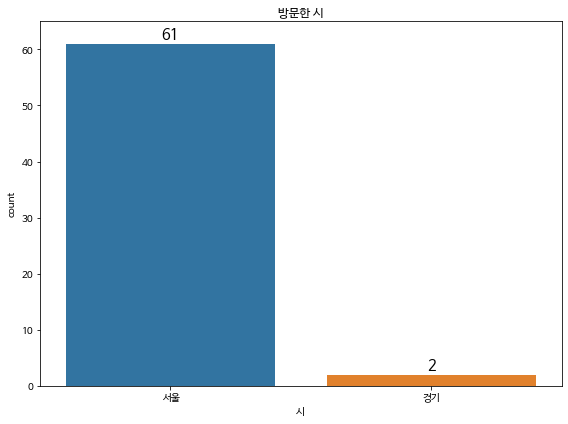

In [ ]:
## 방문한 시
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = '시', data = df1,
                  order = df1['시'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 65)

plt.title("방문한 시")
plt.tight_layout()
plt.show()

In [ ]:
# 방문한 구 (빈도수가 높은 순서대로)
df1['구'].value_counts().sort_values(ascending=False)
df1_gu = df1['구'].value_counts().sort_values(ascending=False)
df1_gu = pd.DataFrame(df1_gu) # 시리즈 -> 데이터프레임 

df1_gu

,구
노원구,16
종로구,13
강남구,9
광진구,6
용산구,5
동대문구,4
중구,4
동작구,3
남양주시,1
양평군,1


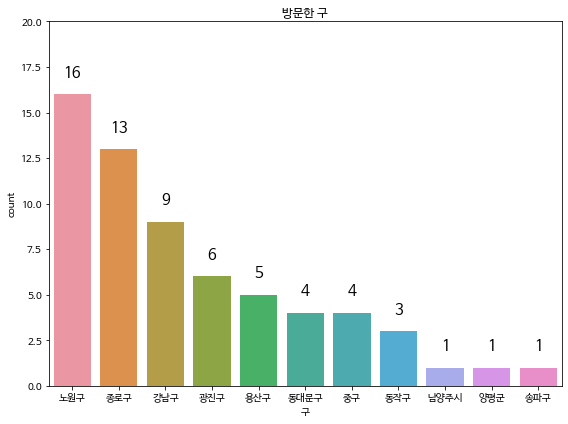

In [ ]:
## 방문한 구
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = '구', data = df1,
                  order = df1['구'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 20)

plt.title("방문한 구")
plt.tight_layout()
plt.show()

In [ ]:
## 방문 장소 top5
df1['장소'].value_counts().sort_values(ascending=False)
place = df1['장소'].value_counts().sort_values(ascending=False)
place = pd.DataFrame(place) # 시리즈 -> 데이터프레임 

place[:5]

,장소
아이파크몰,2
달콤한순간,2
뚝섬한강공원,2
비비브라운,1
가로수길,1


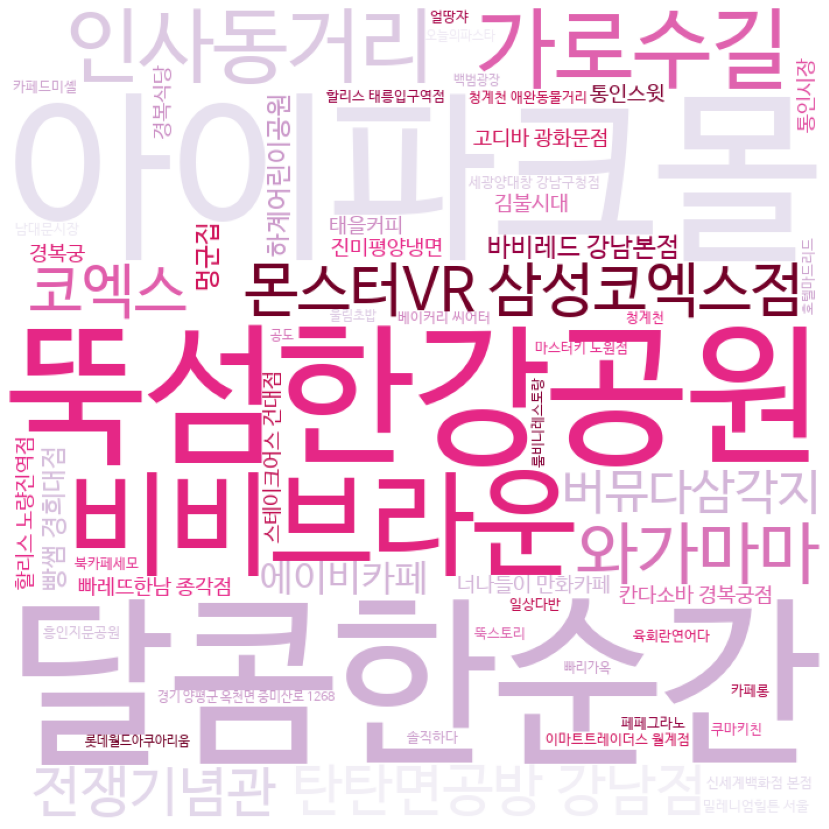

In [ ]:
## 방문장소 워드클라우드

import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20, 15))
path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path = path, background_color ='white', colormap='PuRd',
                      width = 700, height = 700, random_state = 5031).generate_from_frequencies(place['장소'])

plt.imshow(wordcloud)
plt.axis('off') # 그래프 축 제거
plt.show()

# 데이터 분석 및 시각화(df2_교통카드이용내역)

In [ ]:
df2

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간,승차시각
0,0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:06:24,10
1,1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:07:35,17
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,00:00:00,00:00:00,N,00:04:46,13
3,3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,00:00:00,00:00:00,N,00:07:03,15
4,4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:37:14,17
5,5,2022-03-03,지하철,5272-89**-****-5154,23:25:08,00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:39:26,23
6,6,2022-03-04,도시철도,5272-89**-****-5154,15:04:00,15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:38:58,15
7,7,2022-03-04,지하철,5272-89**-****-5154,21:09:07,21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:50:48,21
8,8,2022-03-06,도시철도,5272-89**-****-5154,15:04:02,15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:32:08,15
9,9,2022-03-06,도시철도,5272-89**-****-5154,21:22:51,22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:42:31,21


## 이용수단 분석

In [ ]:
# 이용수단 (빈도수가 높은 순서대로)
df2['이용수단'].value_counts().sort_values(ascending=False)
df2_vehicle = df2['이용수단'].value_counts().sort_values(ascending=False)
df2_vehicle = pd.DataFrame(df2_vehicle) # 시리즈 -> 데이터프레임 

df2_vehicle

,이용수단
서울버스,57
도시철도,30
경기마을버스,19
지하철,11
9호선전철,4
철도공사,2
우이신설경전철,1
경기버스(신),1


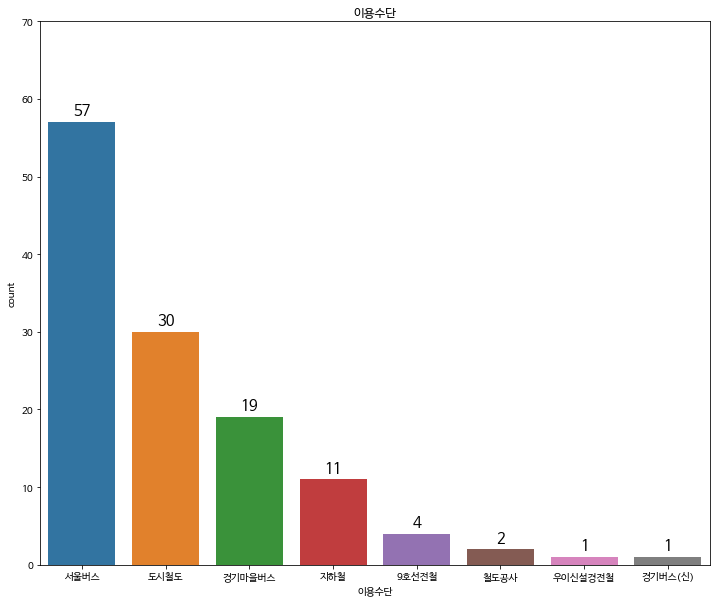

In [ ]:
## 이용수단 시각화
plt.figure(figsize=(12, 10))

ax = sns.countplot(x = '이용수단', data = df2,
                  order = df2['이용수단'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 70)

plt.title("이용수단")
plt.show()

## 출발지/목적지 분석

In [ ]:
# 출발지(승차역) (빈도수가 높은 순서대로)
df2['승차역'].value_counts().sort_values(ascending=False)
df2_start = df2['승차역'].value_counts().sort_values(ascending=False)
df2_start = pd.DataFrame(df2_start) # 시리즈 -> 데이터프레임 

df2_start

,승차역
서울여대.육군사,36
주유소앞다운복지,25
태릉입구,19
노원,4
태릉사거리,4
노량진,3
용산,2
종각,2
경희대입구,2
시청,2


In [ ]:
# 출발지(승차역) top10
df2_start[:10]

,승차역
서울여대.육군사,36
주유소앞다운복지,25
태릉입구,19
노원,4
태릉사거리,4
노량진,3
용산,2
종각,2
경희대입구,2
시청,2


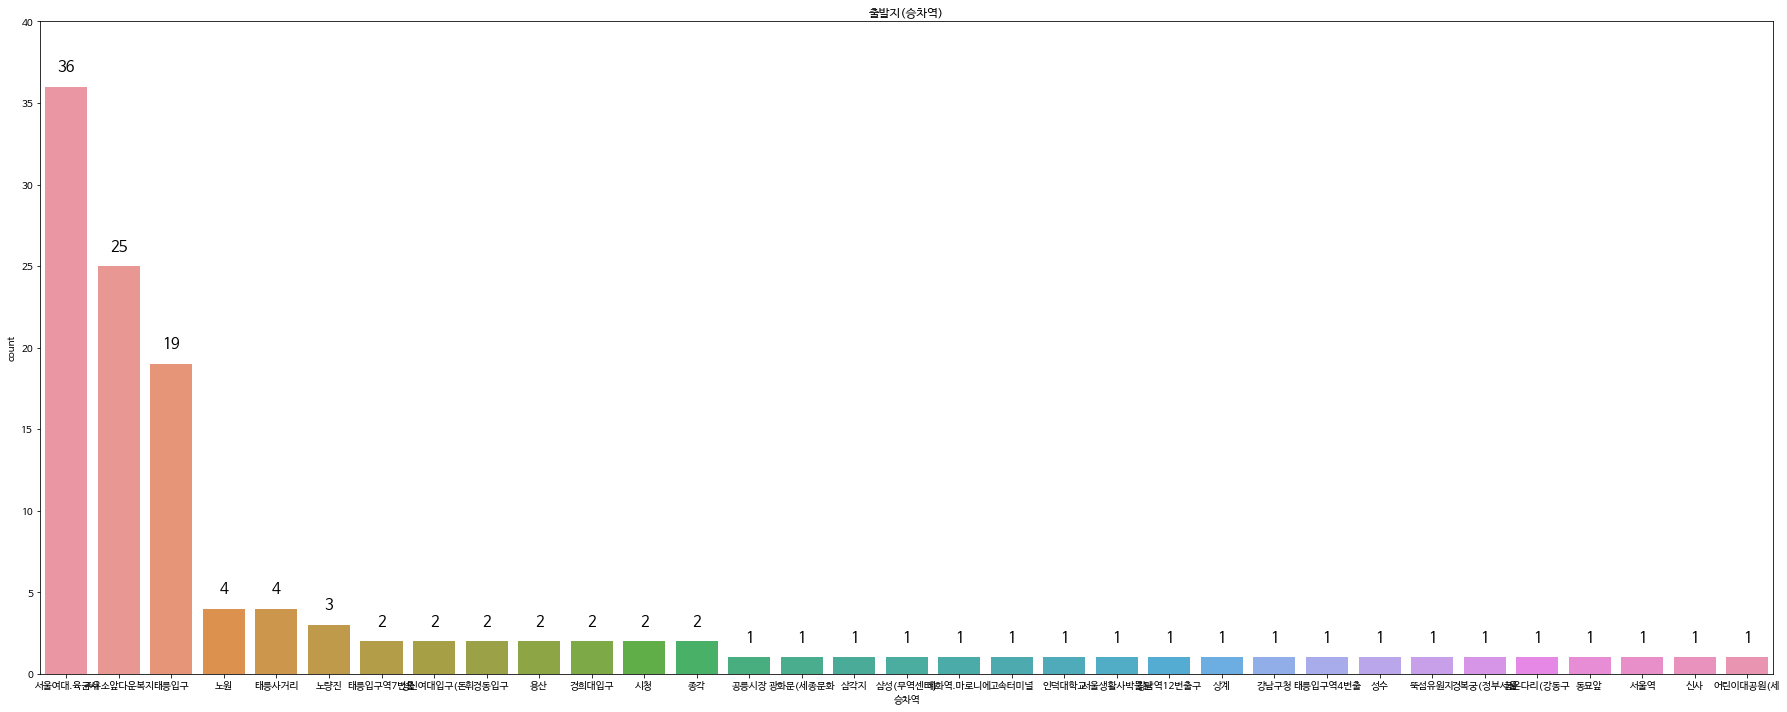

In [ ]:
## 출발지(승차역) 시각화
plt.figure(figsize=(25, 10))

ax = sns.countplot(x = '승차역', data = df2,
                  order = df2['승차역'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 40)

plt.title("출발지(승차역)")
plt.tight_layout()
plt.show()

In [ ]:
# 목적지(하차역) (빈도수가 높은 순서대로)
df2['하차역'].value_counts().sort_values(ascending=False)
df2_end = df2['하차역'].value_counts().sort_values(ascending=False)
df2_end = pd.DataFrame(df2_end) # 시리즈 -> 데이터프레임 

df2_end

,하차역
태릉입구,32
서울여대.육군사,25
서울생활사박물관,12
경춘선숲길.토끼,6
경춘선숲길화랑대,4
용산,4
노원,3
노량진,3
묵동구길,3
성신여대입구(돈,2


In [ ]:
# 목적지(하차역) top10
df2_end[:10]

,하차역
태릉입구,32
서울여대.육군사,25
서울생활사박물관,12
경춘선숲길.토끼,6
경춘선숲길화랑대,4
용산,4
노원,3
노량진,3
묵동구길,3
성신여대입구(돈,2


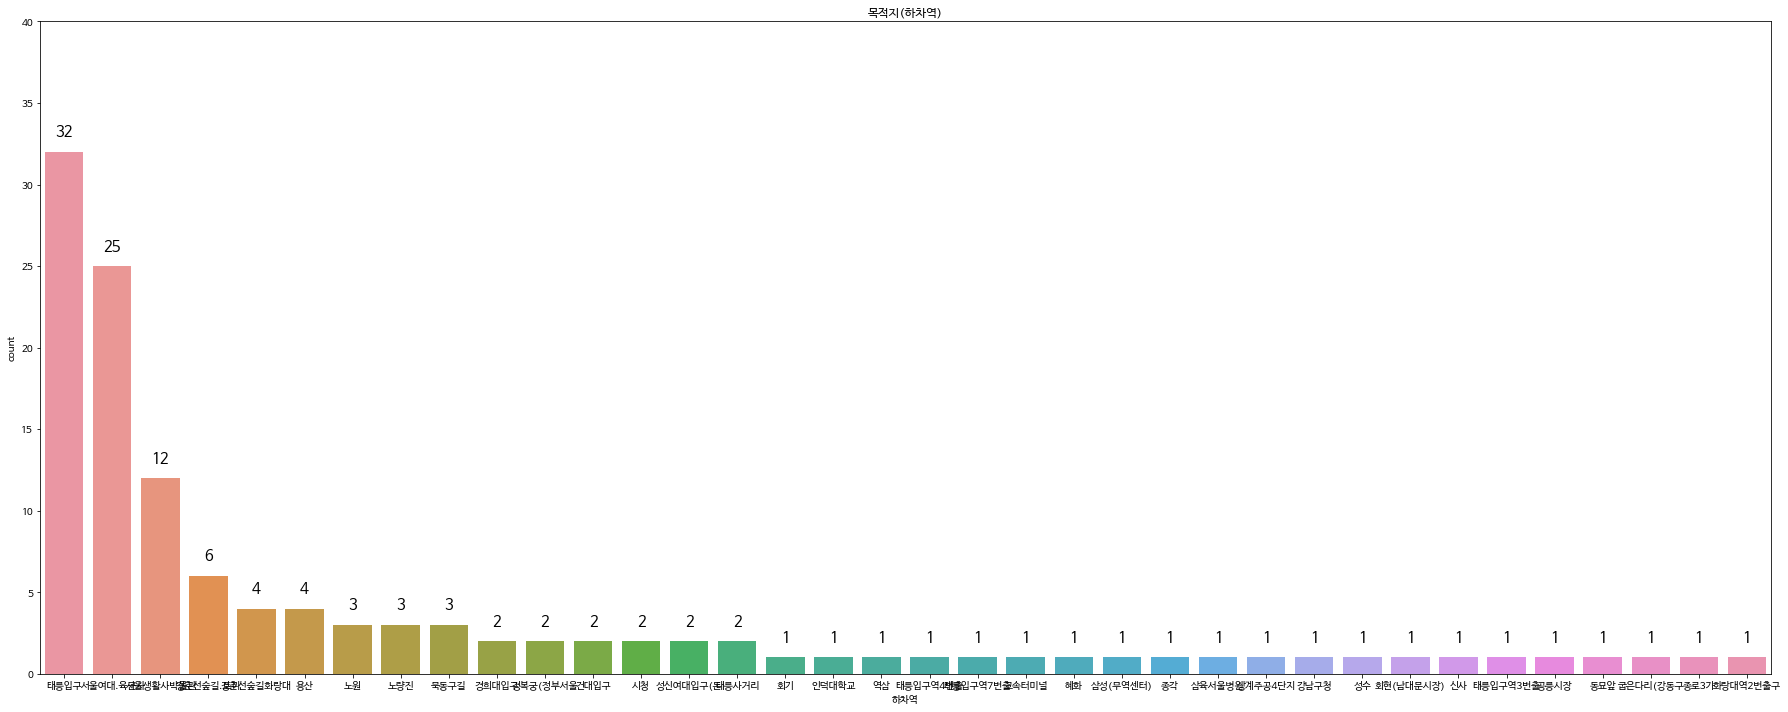

In [ ]:
## 목적지(하차역) 시각화
plt.figure(figsize=(25, 10))

ax = sns.countplot(x = '하차역', data = df2,
                  order = df2['하차역'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 40)

plt.title("목적지(하차역)")
plt.tight_layout()
plt.show()

## 버스 노선 분석

In [ ]:
# 버스 노선 (빈도수가 높은 순서대로)
df2['노선번호'].value_counts().sort_values(ascending=False)
df2_bus = df2['노선번호'].value_counts().sort_values(ascending=False)
df2_bus = pd.DataFrame(df2_bus) # 시리즈 -> 데이터프레임 

df2_bus

,노선번호
202,16
1156,16
1155,13
82A,13
82B,6
1224,4
146,2
1227,2
201,2
3600,1


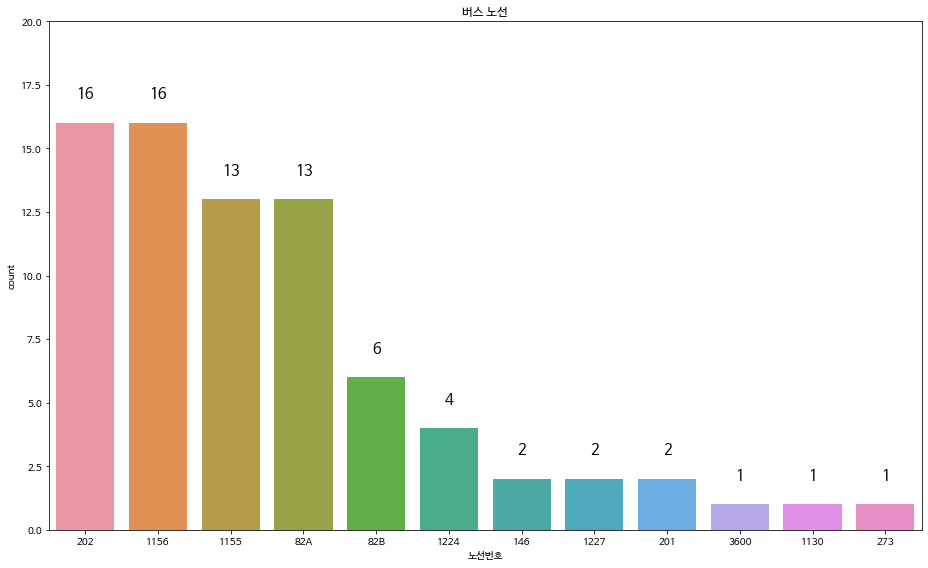

In [ ]:
## 버스 노선 시각화
plt.figure(figsize=(13, 8))
ax = sns.countplot(x = '노선번호', data = df2,
                  order = df2['노선번호'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 20)

plt.title("버스 노선")
plt.tight_layout()
plt.show()

## 학교 갈 때에는 버스로 가야하기 때문에 버스를 이용하지만, 외출시에는 주로 지하철을 선호함.

## 이용금액 분석

In [ ]:
# 3월~5월 교통수단 총 이용금액
print(f"3월~5월 교통수단 총 이용금액 : {sum(df2['이용금액'])}(원)")

3월~5월 교통수단 총 이용금액 : 161050(원)


In [ ]:
# 월별 교통수단 총 이용금액
df2['month']=df2['이용일자'].dt.month
df2_month_cost = df2.groupby('month')['이용금액'].sum()
df2_month_cost = pd.DataFrame(df2_month_cost) # 시리즈 -> 데이터프레임 

df2_month_cost

,이용금액
month,
3,55250
4,48150
5,57650


In [ ]:
# 이용금액
df2_cost = df2.describe()['이용금액']
df2_cost = pd.DataFrame(df2_cost)

df2_cost

,이용금액
count,125.000000
mean,1288.400000
std,159.527528
min,1200.000000
25%,1200.000000
50%,1250.000000
75%,1350.000000
max,2800.000000


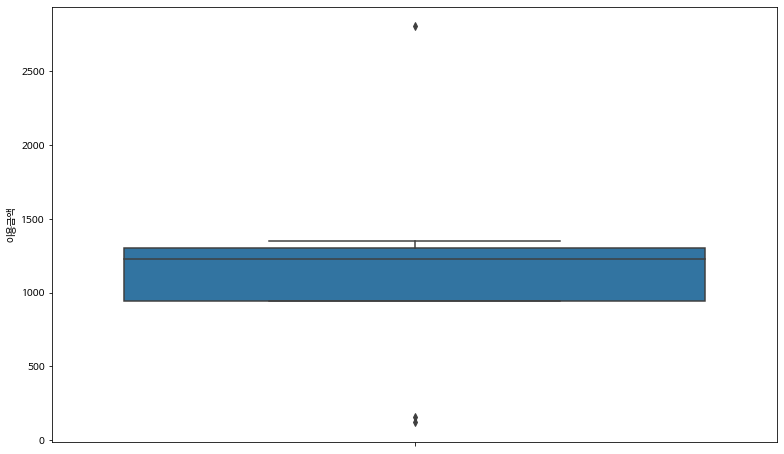

In [ ]:
# 이용금액 시각화
plt.figure(figsize=(13, 8))
sns.boxplot(y = "이용금액", data = df2_cost)

plt.show()

## 요일 분석

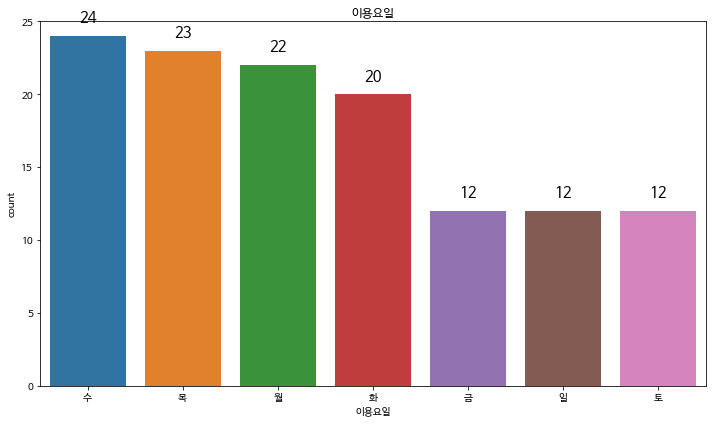

In [ ]:
## 이용요일이 많은 요일
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = '이용요일', data = df2,
                  order = df2['이용요일'].value_counts().index)

for p in ax.patches: # 숫자 표시
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, height, ha = 'center', size = 15)
ax.set_ylim(0, 25)

plt.title("이용요일")
plt.tight_layout()
plt.show()

In [ ]:
# 월별 교통수단 이용 요일
df2_month_day = df2.groupby('month')['이용요일'].value_counts()
df2_month_day = pd.DataFrame(df2_month_day) # 시리즈 -> 데이터프레임 

df2_month_day

이용요일
month 이용요일      
3     목       12
      수        7
      금        6
      화        6
      토        5
      월        4
      일        3
4     수        9
      월        8
      화        7
      목        5
      금        4
      일        3
      토        2
5     월       10
      수        8
      화        7
      목        6
      일        6
      토        5
      금        2

In [ ]:
# 지하철 이용한 것 중 이용요일 분석

In [ ]:
df2.tail(30)

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간,승차시각,month
95,106,2022-05-11,경기버스(신),5272-89**-****-5154,10:49:51,11:15:24,강남역12번출구,태릉입구역4번출,3600,선진시내버스(노선입,2800,2022-05-18,수,00:00:00,00:00:00,N,00:25:33,10,5
96,107,2022-05-11,서울버스,5272-89**-****-5154,14:51:25,15:00:26,서울여대.육군사,서울생활사박물관,1156,태릉교통주식회사,1200,2022-05-18,수,00:00:00,00:00:00,N,00:09:01,14,5
97,108,2022-05-12,서울버스,5272-89**-****-5154,14:36:56,14:42:09,주유소앞다운복지,서울여대.육군사,1155,태릉교통주식회사,1200,2022-05-18,목,00:00:00,00:00:00,N,00:05:13,14,5
98,109,2022-05-12,서울버스,5272-89**-****-5154,16:15:36,16:21:27,서울여대.육군사,경춘선숲길.토끼,1156,태릉교통주식회사,1200,2022-05-18,목,00:00:00,00:00:00,N,00:05:51,16,5
99,110,2022-05-13,서울버스,5272-89**-****-5154,11:36:29,11:42:20,서울생활사박물관,인덕대학교,1155,태릉교통주식회사,1200,2022-05-18,금,11:46:16,11:56:17,Y,00:15:52,11,5
100,112,2022-05-13,서울버스,5272-89**-****-5154,15:11:45,15:26:31,인덕대학교,태릉입구역7번출,1130,삼화상운(주),1200,2022-05-18,금,15:32:34,15:40:46,Y,00:22:58,15,5
101,114,2022-05-14,도시철도,5272-89**-****-5154,15:25:41,16:05:12,태릉입구,고속터미널,NaN,NaN,1450,2022-05-18,토,00:00:00,00:00:00,N,00:39:31,15,5
102,115,2022-05-14,9호선전철,5272-89**-****-5154,16:24:27,16:46:59,고속터미널,노량진,NaN,NaN,1250,2022-05-18,토,00:00:00,00:00:00,N,00:22:32,16,5
103,116,2022-05-15,9호선전철,5272-89**-****-5154,11:18:28,11:55:57,노량진,성신여대입구(돈,NaN,NaN,1350,2022-05-18,일,00:00:00,00:00:00,N,00:37:29,11,5
104,117,2022-05-15,지하철,5272-89**-****-5154,18:20:17,18:25:53,성신여대입구(돈,혜화,NaN,NaN,1250,2022-05-18,일,00:00:00,00:00:00,N,00:05:36,18,5


## 시간 분석

In [ ]:
df2

,index,이용일자,이용수단,이용카드,승차시간,하차시간,승차역,하차역,노선번호,운수사명,이용금액,결제일자,이용요일,환승승차,환승하차,환승,이용시간,승차시각,month
0,0,2022-03-02,서울버스,5272-89**-****-5154,10:45:17,10:51:41,태릉입구역7번출,경춘선숲길화랑대,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:06:24,10,3
1,1,2022-03-02,서울버스,5272-89**-****-5154,17:28:15,17:35:50,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,수,00:00:00,00:00:00,N,00:07:35,17,3
2,2,2022-03-03,경기마을버스,5272-89**-****-5154,13:08:05,13:12:51,태릉입구역7번출,서울여대.육군사,82A,(주)태산운수,1300,2022-03-18,목,00:00:00,00:00:00,N,00:04:46,13,3
3,3,2022-03-03,서울버스,5272-89**-****-5154,15:36:35,15:43:38,서울여대.육군사,서울생활사박물관,1155,태릉교통주식회사,1200,2022-03-18,목,00:00:00,00:00:00,N,00:07:03,15,3
4,4,2022-03-03,도시철도,5272-89**-****-5154,17:56:02,18:33:16,태릉입구,종로3가,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:37:14,17,3
5,5,2022-03-03,지하철,5272-89**-****-5154,23:25:08,00:04:34,종각,태릉입구,NaN,NaN,1350,2022-03-18,목,00:00:00,00:00:00,N,00:39:26,23,3
6,6,2022-03-04,도시철도,5272-89**-****-5154,15:04:00,15:42:58,태릉입구,경복궁(정부서울,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:38:58,15,3
7,7,2022-03-04,지하철,5272-89**-****-5154,21:09:07,21:59:55,경복궁(정부서울,태릉입구,NaN,NaN,1350,2022-03-18,금,00:00:00,00:00:00,N,00:50:48,21,3
8,8,2022-03-06,도시철도,5272-89**-****-5154,15:04:02,15:36:10,태릉입구,굽은다리(강동구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:32:08,15,3
9,9,2022-03-06,도시철도,5272-89**-****-5154,21:22:51,22:05:22,굽은다리(강동구,태릉입구,NaN,NaN,1350,2022-03-18,일,00:00:00,00:00:00,N,00:42:31,21,3


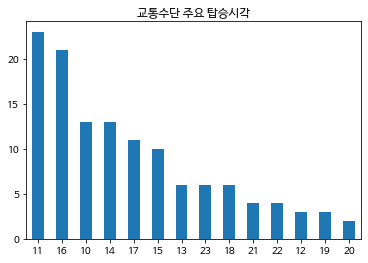

In [ ]:
## 승차시각이 많은 시간대 (교통수단 주요 탑승시각)
plt.title("교통수단 주요 탑승시각")
df2['승차시각'].value_counts().plot(kind='bar', rot=0)

In [ ]:
# 요일 별 교통수단 이용횟수
df2[['이용요일','이용시간']].groupby(['이용요일']).describe()
# [이용요일, count]: 요일 별 교통수단 이용횟수

이용시간                      
     count unique       top freq
이용요일                            
금       12     12  00:38:58    1
목       23     23  00:04:46    1
수       24     24  00:06:24    1
월       22     21  00:06:41    2
일       12     12  00:32:08    1
토       12     12  00:15:13    1
화       20     20  00:04:23    1

In [ ]:
# 요일 별 평균 교통수단 이용시간(분)
df2['이용시간(분)'] = df2['이용시간'].apply(lambda x: str(x)[3:5]) # 이용시간(분) column 생성
df2['이용시간(분)'] = df2['이용시간(분)'].astype(int) # 정수형으로 타입 변경
df2[['이용요일','이용시간(분)']].groupby(['이용요일']).describe()
# [이용요일, mean] : 요일 별 평균 교통수단 이용시간

이용시간(분)                                                      
       count       mean        std   min    25%   50%    75%   max
이용요일                                                              
금       12.0  33.166667  10.743567  15.0  26.50  36.0  41.00  50.0
목       23.0  12.913043  12.841386   4.0   5.00   7.0  13.50  42.0
수       24.0  13.541667  13.246752   0.0   5.75   7.0  22.00  54.0
월       22.0  12.363636  13.902879   4.0   5.00   6.0   7.75  46.0
일       12.0  33.000000  10.660036   5.0  29.75  32.5  38.25  47.0
토       12.0  28.416667  14.712137   1.0  16.50  30.5  39.50  51.0
화       20.0  17.700000  15.245707   4.0   6.75   8.5  25.50  55.0

In [ ]:
# 교통수단 평균 이용시간(분)
print(f"교통수단 평균 이용시간 : {df2['이용시간(분)'].mean()}분")

교통수단 평균 이용시간 : 19.064분


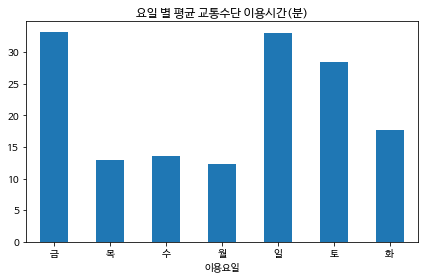

In [ ]:
# 요일 별 평균 교통수단 이용시간(분) 시각화

day_mean_time = df2[['이용요일', '이용시간(분)']].groupby(['이용요일']).mean()
day_mean_time

day_mean_time['이용시간(분)'].plot(kind='bar', rot=0) # rot=0 : xlabel 회전

plt.title("요일 별 평균 교통수단 이용시간(분)")
plt.tight_layout()
plt.show()